# Standard deviational ellipse in `pointpats`

This notebook demonstrates how to compute and visualize the
**standard deviational ellipse** (SDE) for planar point patterns using
`pointpats.centrography`.

The SDE provides a compact summary of:

- **Central location** of the point pattern
- **Dispersion** along two principal axes
- **Orientation** of the pattern in the plane
- Optional **weighting** of points (e.g., counts, magnitudes, intensities)

We will:

1. Construct a simple example point pattern and compute its standard
   deviational ellipse.
2. Show how the SDE computation **dispatches on input type**, including
   NumPy arrays and GeoPandas GeoDataFrames.
3. Compare **unweighted** and **weighted** ellipses to see how weights
   affect the ellipse size and orientation.
4. Explore additional options in the ellipse construction, including
   corrections that align or differ from CrimeStat-style ellipses.



In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from pointpats import ellipse

In [2]:
import pointpats


## 1. Example point pattern

- 100 points
- randomly distributed in [(0,0), (10, 10)]

In [3]:
import numpy as np

seed = 65647437836358831880808032086803839626
rng = np.random.default_rng(seed)
points = rng.integers(0, 100, (50, 2))

<Axes: >

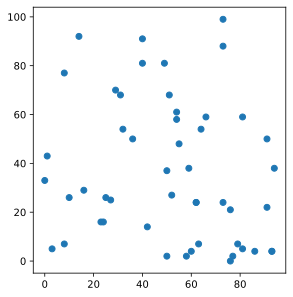

In [4]:
points_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(points[:,0], points[:,1]))

points_gdf.plot()

## 2. Dispatching on input type

`ellipse` can take the following inputs

- points as a 2-D numpy array
- a geodataframe with a point GeoSeries

It is important to note that the return types differ between these two cases.

### 2.1 Passing an array

In [5]:
ellipse_ = ellipse(points)

This will return a tuple with
- length of the major axis
- length of the minor axis
- angle of rotation (in radians)

In [6]:
ellipse_

(np.float64(43.85494662229593),
 np.float64(36.28453973005919),
 np.float64(-0.9362557045365753))

### 2.2 Passing a GeoDataFrame

In [7]:
ellipse_poly = ellipse(points_gdf)

This will return a `shapely` `Polygon`

In [8]:
type(ellipse_poly)

shapely.geometry.polygon.Polygon

## 3. Unweighted and weighted ellipses

The default is to treat the points as an unmarked point pattern and construct the ellipse accordingly.

In [9]:
ellipse_gdf = gpd.GeoDataFrame(geometry=[ellipse_poly])

<Axes: >

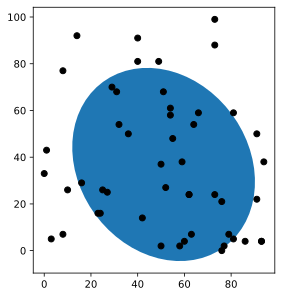

In [10]:
base = ellipse_gdf.plot()
points_gdf.plot(ax=base, color='k')

### 3.1 Weighted points

If marks are available to attach to each point, the weighted standard deviational ellipse can be constructed. Here we use use the $y$ coordinate as the weight for demonstration:

Text(0.5, 1.0, 'Marked Point Pattern')

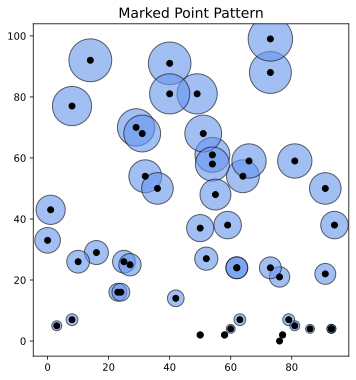

In [11]:
# Normalize or scale marker size (you can tune this)
size_scale = 20  # try 10, 20, 50 etc. to get a good size visually
marker_sizes = points[:,1] * size_scale

fig, ax = plt.subplots(figsize=(8, 6))
base = points_gdf.plot(ax=ax, markersize=marker_sizes, alpha=0.6, color='cornflowerblue', edgecolor='k')
points_gdf.plot(ax=base, color='k')
ax.set_title("Marked Point Pattern", fontsize=14)

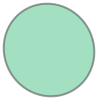

In [12]:
ellipse_w_poly = ellipse(points_gdf, weights=points[:,1])
ellipse_w_poly

In [13]:
mc = pointpats.mean_center(points)
mc

array([51.1 , 36.88])

In [14]:
wmc = pointpats.weighted_mean_center(points, points[:,1])
wmc

array([47.3302603 , 59.13665944])

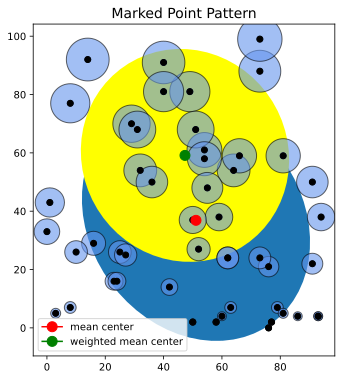

In [15]:

size_scale = 20  
marker_sizes = points[:,1] * size_scale

fig, ax = plt.subplots(figsize=(8, 6))

ellipse_gdf.plot(ax=ax)
gpd.GeoSeries([ellipse_w_poly]).plot(color='yellow', ax=ax)
points_gdf.plot(ax=ax, color='k')
base = points_gdf.plot(ax=ax, markersize=marker_sizes, alpha=0.6, color='cornflowerblue', edgecolor='k')
points_gdf.plot(ax=ax, color='k')
ax.plot(*mc, marker='o', color='red', markersize=10, label='mean center')
ax.plot(*wmc, marker='o', color='green', markersize=10, label='weighted mean center')
ax.legend()
ax.set_title("Marked Point Pattern", fontsize=14);

## 4. Other options

The default option constructs the standard deviational ellipse following the method used in CrimeStat.

In [16]:
ellipse(points)

(np.float64(43.85494662229593),
 np.float64(36.28453973005919),
 np.float64(-0.9362557045365753))

The default construction can be overridden in one of two (or both) ways.

The first employs the `yuill` method which employs a different estimator for the major and minor axes lengths:

In [17]:
ellipse(points, method='yuill', crimestatCorr=False)  

(np.float64(31.01013014519952),
 np.float64(25.65704409535755),
 np.float64(-0.9362557045365753))

This results in shorter axes lengths relative to to crimestat.

The second approach drops the degrees of freedom correction used in the default:

In [18]:
ellipse(points, method='yuill', degfreedCorr=False)  

(np.float64(42.96889676864705),
 np.float64(35.551443156155464),
 np.float64(-0.9362557045365753))

Again, this shortens the estimated axes.

Finally, both corrections can be toggled off:

In [19]:
ellipse(points, method='yuill', crimestatCorr=False, degfreedCorr=False)  

(np.float64(30.383598285215058),
 np.float64(25.138666536685605),
 np.float64(-0.9362557045365753))

## 5. Recap

In this notebook, we:

- Introduced the **standard deviational ellipse** (SDE) as a summary of
  the central location, dispersion, and orientation of a point pattern.
- Showed how `pointpats.centrography` can construct an SDE from both
  NumPy arrays and GeoPandas GeoDataFrames.
- Compared **unweighted** and **weighted** ellipses to highlight how
  point weights influence the ellipse axes and rotation.
- Explored additional construction options, including corrections that
  control consistency with CrimeStat-style ellipses.

The SDE complements other centrographic measures (mean center, standard
distance) and the quadrat- and distance-based statistics notebooks to
provide a richer description of spatial point pattern structure in
`pointpats`.
